In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
# Storing the data into a dataframe
df = pd.DataFrame(data=dataset['data'], columns=dataset.feature_names)
df['target'] = dataset['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [12]:
# Storing the dataset into a csv file (not necessary but do it.. (extends the code too))
df.to_csv("Diabetes_data.csv", index=False)

In [11]:
# Seperating the independent and dependent features
X = df.drop('target', axis=1)
y = df['target']

#  the goal is to predict a quantitative measure of disease progression one year after baseline for diabetes patients.
target: A real-valued continuous variable — it represents a disease progression score (e.g., a health indicator based on blood measurements, age, BMI, etc.).

In [13]:
# Train test split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [14]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.159513,0.180804,0.324133,0.262160,0.199716,-0.023058,0.165480,0.266254,0.266706
sex,0.159513,1.000000,0.045831,0.180247,0.017967,0.110442,-0.338820,0.308991,0.105984,0.159663
bmi,0.180804,0.045831,1.000000,0.375038,0.255045,0.257140,-0.360168,0.428866,0.450936,0.389013
bp,0.324133,0.180247,0.375038,1.000000,0.242522,0.161199,-0.107979,0.208703,0.365678,0.375972
s1,0.262160,0.017967,0.255045,0.242522,1.000000,0.892852,0.042951,0.555728,0.520963,0.308419
s2,0.199716,0.110442,0.257140,0.161199,0.892852,1.000000,-0.194325,0.656085,0.298622,0.272405
s3,-0.023058,-0.338820,-0.360168,-0.107979,0.042951,-0.194325,1.000000,-0.735179,-0.379108,-0.283662
s4,0.165480,0.308991,0.428866,0.208703,0.555728,0.656085,-0.735179,1.000000,0.615701,0.419010
s5,0.266254,0.105984,0.450936,0.365678,0.520963,0.298622,-0.379108,0.615701,1.000000,0.456972
s6,0.266706,0.159663,0.389013,0.375972,0.308419,0.272405,-0.283662,0.419010,0.456972,1.000000


Text(0.5, 1.0, 'Correlation')

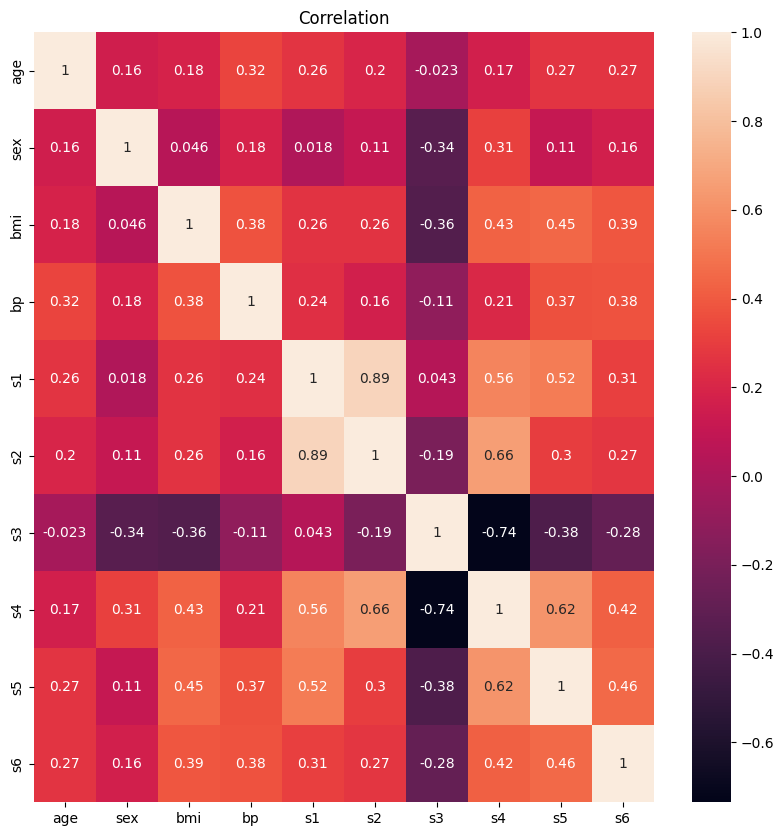

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True)
plt.title("Correlation")

In [16]:
# Model Training
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
# Hyperparameter Tuning
params = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,1,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=tree_regressor, param_grid=params, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')

In [27]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 1, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'splitter': 'random'}
-4320.841552389033


In [30]:
# Model Predictions
y_pred_grid = grid.predict(X_test)
print(y_pred_grid)

[192.0952381  130.96428571 192.0952381  233.33333333 130.96428571
 111.88235294 271.66666667 233.33333333 122.90909091 111.88235294
 134.66666667  51.          90.         233.33333333  90.
 130.96428571 233.33333333 180.         158.93103448 192.0952381
 141.08333333 134.66666667  90.         192.0952381  111.88235294
 158.93103448 158.93103448 158.93103448  90.         130.96428571
 273.33333333  87.22222222 192.0952381  192.0952381  130.96428571
 271.66666667 122.90909091 122.90909091 150.875       90.
  90.          90.         158.93103448 150.875      122.90909091
  90.          90.          68.66666667  90.         141.08333333
 111.88235294  90.         158.93103448  90.         212.66666667
 111.88235294 134.66666667 192.0952381  111.88235294  68.66666667
 192.0952381  141.08333333 111.88235294  90.         150.875
 192.0952381  212.66666667 192.0952381  119.5        141.08333333
 141.08333333 192.0952381  233.33333333 158.93103448  90.
 150.875      233.33333333 141.08333333 

In [32]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2 Score : {r2_score(y_test,y_pred_grid)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred_grid)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred_grid)}')

R2 Score : 0.35984273638645214
Mean Absolute Error : 47.2019580135706
Mean Squared Error : 3539.8710896592656


In [33]:
select_model = DecisionTreeRegressor(criterion='friedman_mse',max_depth=5, max_features='log2',splitter='random')
select_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2', splitter='random')

[Text(0.65, 0.9166666666666666, 'x[4] <= 0.111\nfriedman_mse = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.4, 0.75, 'x[2] <= -0.026\nfriedman_mse = 6058.695\nsamples = 323\nvalue = 153.467'),
 Text(0.525, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'x[7] <= 0.024\nfriedman_mse = 2457.732\nsamples = 95\nvalue = 106.316'),
 Text(0.1, 0.4166666666666667, 'x[5] <= -0.054\nfriedman_mse = 2127.267\nsamples = 85\nvalue = 100.365'),
 Text(0.05, 0.25, 'x[8] <= -0.086\nfriedman_mse = 2089.989\nsamples = 23\nvalue = 105.522'),
 Text(0.025, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 1\nvalue = 143.0'),
 Text(0.075, 0.08333333333333333, 'friedman_mse = 2118.24\nsamples = 22\nvalue = 103.818'),
 Text(0.15, 0.25, 'x[2] <= -0.06\nfriedman_mse = 2127.57\nsamples = 62\nvalue = 98.452'),
 Text(0.125, 0.08333333333333333, 'friedman_mse = 733.965\nsamples = 16\nvalue = 76.688'),
 Text(0.175, 0.08333333333333333, 'friedman_mse = 2390.239\nsamples = 46\nvalue = 106.022'),
 

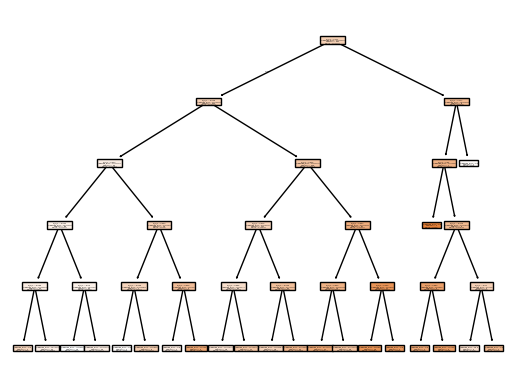

In [36]:
# Visualise the decison tree
plt.Figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(select_model, filled=True)